In [1]:
#import necessary librairies 
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
from IPython.core.display import clear_output
from warnings import warn

warn("Warning Simulation")

C:\Users\Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Warning Simulation
  if __name__ == '__main__':


In [9]:
pages = [str(i) for i in [1,51,101,151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951,1001]]

# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
genres = []

In [10]:
# For every page in the interval 1-4
for page in pages:
    # Make a get request
    response = requests.get('https://www.imdb.com/search/title/?title_type=feature&year=2020-01-01,2020-12-31&sort=num_votes,desc&start=' + page + '&ref_=adv_nxt')
    # Pause the loop
    sleep(randint(8, 15))

    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(
            requests, response.status_code))

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the 50 movie containers from a single page
    mv_containers = page_html.find_all(
        'div', class_='lister-item mode-advanced')

    # For every movie of these 50
    for container in mv_containers:
        # If the movie has a Metascore, then:
        if container.find('div', class_='ratings-metascore') is not None:

            # Scrape the name
            name = container.h3.a.text
            names.append(name)

            # Scrape the year
            year = container.h3.find(
                'span', class_='lister-item-year').text
            years.append(year)

            # Scrape the IMDB rating
            imdb = float(container.strong.text)
            imdb_ratings.append(imdb)

            # Scrape the Metascore
            m_score = container.find('span', class_='metascore').text
            metascores.append(int(m_score))

            # Scrape the number of votes
            vote = container.find('span', attrs={'name': 'nv'})[
                'data-value']
            votes.append(int(vote))
            # Scrape the genre
            genre = container.find('span', class_ = 'genre').text
            genres.append(genre)
            

In [5]:
print(response.text)




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Feature Film,
Released between 2020-01-01 and 2020-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<

In [13]:
genres = [i.replace('\n', '') for i in genres]
genres = [i.replace(' ', '') for i in genres]
genres

['Action,Thriller',
 'Action,Adventure,Crime',
 'Horror,Mystery,Sci-Fi',
 'Action,Comedy,Crime',
 'Action,Adventure,Fantasy',
 'Action,Sci-Fi',
 'Animation,Adventure,Comedy',
 'Action,Adventure,Comedy',
 'Comedy,Music',
 'Action,Comedy,Crime',
 'Action,Horror,Thriller',
 'Action,Crime,Sci-Fi',
 'Action,Drama,Sci-Fi',
 'Action,Drama,History',
 'Action,Horror,Sci-Fi',
 'Comedy,Fantasy,Mystery',
 'Action,Adventure,Drama',
 'Adventure,Comedy,Family',
 'Biography,Drama,History',
 'Adventure,Drama,War',
 'Adventure,Drama,Family',
 'Comedy,Romance',
 'Drama,Thriller',
 'Action,Adventure,Fantasy',
 'Drama,Sport',
 'Comedy,Drama,Romance',
 'Comedy,Drama',
 'Comedy,Drama,Romance',
 'Comedy,Drama,Romance',
 'Fantasy,Horror,Mystery',
 'Adventure,Family,Fantasy',
 'Action,Comedy,Crime',
 'Drama,Romance',
 'Horror,Mystery',
 'Action,Comedy,Family',
 'Drama',
 'Comedy,Romance',
 'Comedy,Romance',
 'Thriller',
 'Animation,Adventure,Comedy',
 'Adventure,Comedy,Music',
 'Drama,Mystery,Thriller',
 'Biogr

In [16]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'genre':genres})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      209 non-null    object 
 1   year       209 non-null    object 
 2   imdb       209 non-null    float64
 3   metascore  209 non-null    int64  
 4   votes      209 non-null    int64  
 5   genre      209 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ KB
None


,movie,year,imdb,metascore,votes,genre
0,Extraction,(2020),6.7,56,143077,"Action,Thriller"
1,Birds of Prey: And the Fantabulous Emancipatio...,(2020),6.1,60,140512,"Action,Adventure,Crime"
2,The Invisible Man,(I) (2020),7.1,72,131705,"Horror,Mystery,Sci-Fi"
3,Bad Boys for Life,(2020),6.6,59,112948,"Action,Comedy,Crime"
4,The Old Guard,(2020),6.7,70,102331,"Action,Adventure,Fantasy"
5,Tenet,(2020),7.9,69,98568,"Action,Sci-Fi"
6,Onward,(I) (2020),7.4,61,78438,"Animation,Adventure,Comedy"
7,Sonic the Hedgehog,(2020),6.5,47,75669,"Action,Adventure,Comedy"
8,Eurovision Song Contest: The Story of Fire Saga,(2020),6.5,50,63797,"Comedy,Music"
9,Spenser Confidential,(2020),6.2,49,61930,"Action,Comedy,Crime"


In [18]:
#read scraped dataset
movie_ratings = pd.read_csv('movie_ratings2.csv')
movie_ratings

,Unnamed: 0,movie,year,imdb,metascore,votes,genre
0,0,Extraction,(2020),6.7,56,143077,"Action,Thriller"
1,1,Birds of Prey: And the Fantabulous Emancipatio...,(2020),6.1,60,140512,"Action,Adventure,Crime"
2,2,The Invisible Man,(I) (2020),7.1,72,131705,"Horror,Mystery,Sci-Fi"
3,3,Bad Boys for Life,(2020),6.6,59,112948,"Action,Comedy,Crime"
4,4,The Old Guard,(2020),6.7,70,102331,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...
204,204,Kill It and Leave This Town,(2020),7.0,72,86,Animation
205,205,The World to Come,(2020),6.7,86,78,Drama
206,206,Ammonite,(2020),7.7,77,77,"Drama,Romance"
207,207,Nuevo orden,(2020),7.0,71,66,Drama


In [19]:
movie_ratings['year'].unique()

array(['(2020)', '(I) (2020)', '(II) (2020)', '(IV) (2020)'], dtype=object)

In [21]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

AttributeError: Can only use .str accessor with string values!

In [22]:
movie_ratings['year'].head(3)

0    2020
1    2020
2    2020
Name: year, dtype: int32

In [137]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,genre,n_imdb
0,Extraction,2020,6.7,56,142953,"[Action, Thriller]",67.0
1,Birds of Prey: And the Fantabulous Emancipatio...,2020,6.1,60,140275,"[Action, Adventure, Crime]",61.0
2,The Invisible Man,2020,7.1,72,131557,"[Horror, Mystery, Sci-Fi]",71.0


In [17]:
#save scraped dataset
movie_ratings.to_csv('movie_ratings2.csv')

No handles with labels found to put in legend.


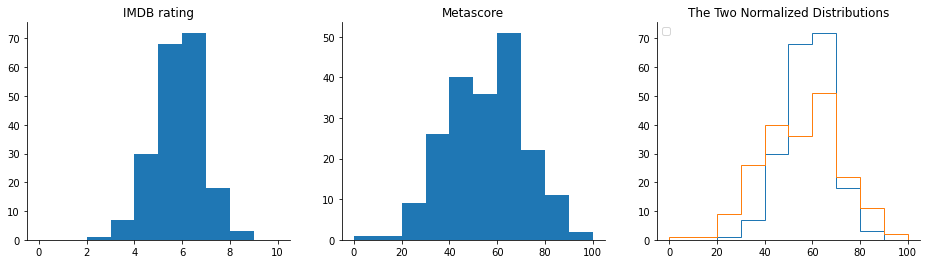

In [139]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.

The distribution of Metascore ratings is left screwed – most ratings are between 60 and 70. According to this distribution, there are indeed fewer very good and very bad movies, but not that few as the IMDB ratings indicate.

On the comparative graph, it’s clearer that both the IMDB and Matascore distribution is highly skewed toward the higher part of the average ratings. What might be the reason for that skew? this may be caused by a situation where many users tend to have a binary method of assessing movies. If they like the movie, they give it a higher rating. If they don’t like the movie, they give it a very small rating, or they don’t bother to rate the movie. 

# TOP 5 MOVIES WITH THE HIGHEST VOTES AND RATINGS

In [3]:
# import necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [4]:
# import Movie Ratings Dataset
movies_rate= pd.read_csv('movie_ratings2.csv')

In [5]:
movies_rate.head()

,Unnamed: 0,movie,year,imdb,metascore,votes,genre,n_imdb
0,0,Extraction,2020,6.7,56,142536,"Action,Thriller",67.0
1,1,Birds of Prey: And the Fantabulous Emancipatio...,2020,6.1,60,139352,"Action,Adventure,Crime",61.0
2,2,The Invisible Man,2020,7.1,72,130951,"Horror,Mystery,Sci-Fi",71.0
3,3,Bad Boys for Life,2020,6.6,59,112478,"Action,Comedy,Crime",66.0
4,4,The Old Guard,2020,6.7,70,100785,"Action,Adventure,Fantasy",67.0


In [6]:
movies_rate.columns

Index(['Unnamed: 0', 'movie', 'year', 'imdb', 'metascore', 'votes', 'genre',
       'n_imdb'],
      dtype='object')

In [7]:

movies_rate= movies_rate[['movie','year','metascore','votes','genre','n_imdb']]
movies_rate.head()

,movie,year,metascore,votes,genre,n_imdb
0,Extraction,2020,56,142536,"Action,Thriller",67.0
1,Birds of Prey: And the Fantabulous Emancipatio...,2020,60,139352,"Action,Adventure,Crime",61.0
2,The Invisible Man,2020,72,130951,"Horror,Mystery,Sci-Fi",71.0
3,Bad Boys for Life,2020,59,112478,"Action,Comedy,Crime",66.0
4,The Old Guard,2020,70,100785,"Action,Adventure,Fantasy",67.0


In [8]:
Pd= movies_rate[['movie','metascore','n_imdb']]
Pd.head()

,movie,metascore,n_imdb
0,Extraction,56,67.0
1,Birds of Prey: And the Fantabulous Emancipatio...,60,61.0
2,The Invisible Man,72,71.0
3,Bad Boys for Life,59,66.0
4,The Old Guard,70,67.0


In [9]:
# sort movies based on the highest number of ratings
pd1 = Pd.sort_values('n_imdb', ascending= False).iloc[:5] # iloc[:5], .head()

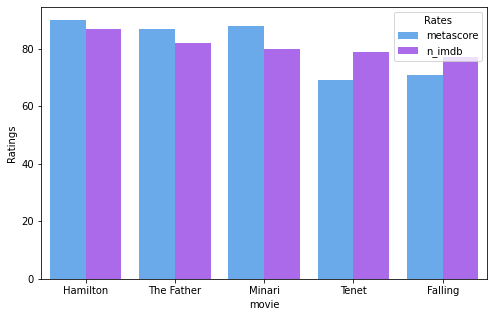

In [10]:
# visualize the 5 best movies based on metascore and imdb ratings
pd1 = pd1.melt('movie', var_name='Rates',  value_name='Ratings')
plt.figure(figsize=(8,5))
g = sns.barplot(x="movie", y="Ratings", hue='Rates', data=pd1, palette='cool')

After observing the positive correlation between IMDB and Metascore, it is safe to  conclude that Hamilton, The Father, Minari Movie, Tenet and Faling are the top best 5 movis in 2020. 

## CORRELATION BETWEEN IMDB AND METASCORE RATINGS

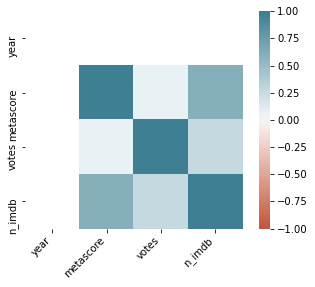

In [11]:
# to get the correlation between Imdb and metascore
corr = movies_rate.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the heatmap, we can assume that there is a very high positive correlation between imdb and metascore ratings for most movies produced in 2020. Also, votes had little or no influence on imdb and metascore, however, it has more effect on imdb than metascore.This shows although a movie must have garnered lots of votes, it doesn't guarantee it's a good movie.    

In [12]:
movies_rate

,movie,year,metascore,votes,genre,n_imdb
0,Extraction,2020,56,142536,"Action,Thriller",67.0
1,Birds of Prey: And the Fantabulous Emancipatio...,2020,60,139352,"Action,Adventure,Crime",61.0
2,The Invisible Man,2020,72,130951,"Horror,Mystery,Sci-Fi",71.0
3,Bad Boys for Life,2020,59,112478,"Action,Comedy,Crime",66.0
4,The Old Guard,2020,70,100785,"Action,Adventure,Fantasy",67.0
...,...,...,...,...,...,...
192,Uncle Frank,2020,52,96,Drama,72.0
193,The Surrogate,2020,74,90,Drama,54.0
194,Falling,2020,71,87,Drama,77.0
195,Bad Hair,2020,65,86,"Comedy,Horror",52.0


In [13]:
movie_genre = movies_rate.copy()
movie_genre.head()

,movie,year,metascore,votes,genre,n_imdb
0,Extraction,2020,56,142536,"Action,Thriller",67.0
1,Birds of Prey: And the Fantabulous Emancipatio...,2020,60,139352,"Action,Adventure,Crime",61.0
2,The Invisible Man,2020,72,130951,"Horror,Mystery,Sci-Fi",71.0
3,Bad Boys for Life,2020,59,112478,"Action,Comedy,Crime",66.0
4,The Old Guard,2020,70,100785,"Action,Adventure,Fantasy",67.0


In [14]:
# Build list of all unique genre
genre_list = []
for item in movie_genre.genre.values:
    labels = item.split(',')
    for label in labels:
        if label not in genre_list:
            genre_list.append(label)
genre_list, len(genre_list)

(['Action',
  'Thriller',
  'Adventure',
  'Crime',
  'Horror',
  'Mystery',
  'Sci-Fi',
  'Comedy',
  'Fantasy',
  'Animation',
  'Music',
  'Drama',
  'History',
  'Family',
  'Biography',
  'War',
  'Romance',
  'Sport',
  'Musical',
  'Western'],
 20)

# MOST PREVALENT GENRE

In [15]:
# Add onehot features for every genre
for label in genre_list:
    movie_genre[label] = movie_genre['genre'].apply(lambda x: 1 if label in x.split(',') else 0)

# Display head
movie_genre.drop('genre', axis=1)

,movie,year,metascore,votes,n_imdb,Action,Thriller,Adventure,Crime,Horror,...,Music,Drama,History,Family,Biography,War,Romance,Sport,Musical,Western
0,Extraction,2020,56,142536,67.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Birds of Prey: And the Fantabulous Emancipatio...,2020,60,139352,61.0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Invisible Man,2020,72,130951,71.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Bad Boys for Life,2020,59,112478,66.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,The Old Guard,2020,70,100785,67.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Uncle Frank,2020,52,96,72.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
193,The Surrogate,2020,74,90,54.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
194,Falling,2020,71,87,77.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
195,Bad Hair,2020,65,86,52.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


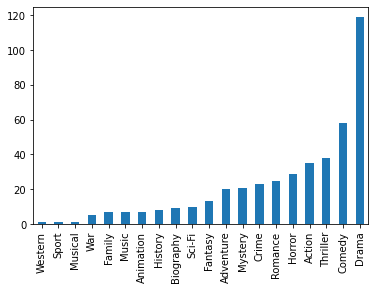

In [16]:
# Histogram of label instances
movie_genre[genre_list].sum().sort_values().plot.bar()

The plot shows that the most prevelent genre for movies produced in 2020 is Drama.

# AVERAGE MOVIE RATING

<ipython-input-17-e646c24318e0>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


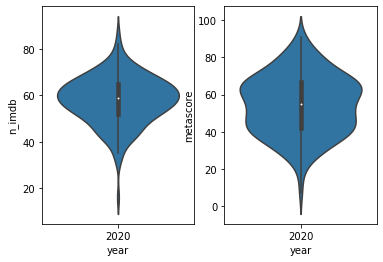

In [17]:
fig, ax =plt.subplots(1, 2)

p = sns.violinplot(data=movie_genre,
                   x = 'year',
                   y = 'n_imdb', ax=ax[0])

q = sns.violinplot(data=movie_genre,
                   x = 'year',
                   y =  'metascore', ax=ax[1])

fig.show()

2020 Average rating bulges around 60 and 65 for imdb and metascore respectively. This shows that very few movies are rated higher or lower than this range.

In [18]:
from wordcloud import WordCloud
#from pillow import img


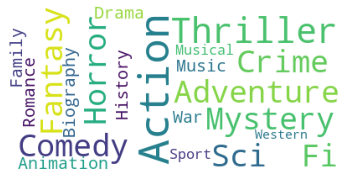

In [19]:
text = 'Action Thriller Adventure Crime Horror Mystery Sci-Fi Comedy Fantasy Animation Music Drama History Family Biography War Romance Sport Musical Western' 
cloud = WordCloud(max_font_size= 50, max_words= 100, background_color='white').generate(text)
plt.axis('off')
plt.imshow(cloud)
plt.show()